In [1]:
import time
import datetime
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel, CompoundKernel

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')
print(test_batch.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [4]:
x_train_flatten = np.concatenate((data_batch_1[b'data'], data_batch_2[b'data'], data_batch_3[b'data'], data_batch_4[b'data'], data_batch_5[b'data']), axis=0)
y_train = np.concatenate((data_batch_1[b'labels'], data_batch_2[b'labels'], data_batch_3[b'labels'], data_batch_4[b'labels'], data_batch_5[b'labels']), axis=0)
x_test_flatten = test_batch[b'data']
y_test = np.array(test_batch[b'labels'])
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


In [5]:
x_train = x_train_flatten.reshape(len(x_train_flatten), 3, 32, 32).transpose(0, 2, 3, 1)
x_test = x_test_flatten.reshape(len(x_test_flatten), 3, 32, 32).transpose(0, 2, 3, 1)
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
x_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
x_train_gray_flatten = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_gray_flatten = x_test_gray.reshape(x_test_gray.shape[0], -1)

In [19]:
x_train_flatten[0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [14]:
x_train_gray[0]

array([[ 62,  45,  47, ..., 128, 121, 120],
       [ 20,   0,   7, ...,  82,  77,  82],
       [ 23,   6,  24, ...,  78,  78,  68],
       ...,
       [152, 123, 125, ..., 117,  27,  32],
       [131, 104, 115, ..., 136,  58,  51],
       [139, 123, 130, ..., 174, 112,  90]], dtype=uint8)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def showimage(image, train):
    if train == True:
        plt.imshow(x_train[image])
        plt.axis('off')
        plt.show()
        return (label[y_train[image]])
    else:
        plt.imshow(x_test[image])
        plt.axis('off')
        plt.show()
        return (label[y_test[image]])

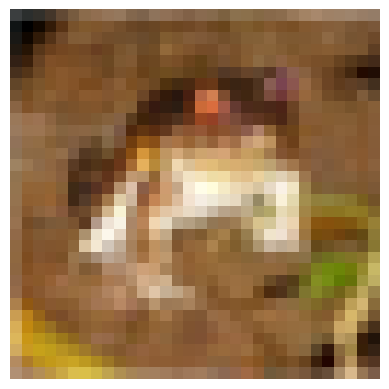

'frog'

In [9]:
showimage(0, 1)

# Best Kernel

In [ ]:
x = x_train_flatten[:1000,:]
y = y_train[:1000]
grid = dict()
grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]
model = GaussianProcessClassifier()

In [ ]:
start = time.time()
search = GridSearchCV(model, grid, scoring='accuracy')
results = search.fit(x, y)
end = time.time()
print(datetime.timedelta(seconds = int(end-start)))

In [ ]:
print('Best Mean Accuracy', results.best_score_)
print('Best Kernel', results.best_params_)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(round(mean, 2) , param)

# Normal Classification

In [10]:
start = time.time()
kernel = 1 * RationalQuadratic(alpha=1, length_scale=1)
gpc = GaussianProcessClassifier(kernel=kernel).fit(x_train_flatten[:1000,:], y_train[:1000])
end = time.time()
print(datetime.timedelta(seconds = int(end-start)))

C:\Users\pongp\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


0:09:01


In [11]:
prob = gpc.predict_proba(x_test_flatten)
predict = np.argmax(prob, axis=1)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42      1000
           1       0.39      0.57      0.46      1000
           2       0.24      0.31      0.27      1000
           3       0.29      0.02      0.03      1000
           4       0.35      0.29      0.32      1000
           5       0.32      0.27      0.30      1000
           6       0.37      0.49      0.42      1000
           7       0.37      0.38      0.37      1000
           8       0.40      0.54      0.46      1000
           9       0.41      0.40      0.41      1000

    accuracy                           0.37     10000
   macro avg       0.36      0.37      0.35     10000
weighted avg       0.36      0.37      0.35     10000



In [12]:
gpc.kernel_

CompoundKernel(3.28, -2.06, 9.14, 2.93, 11.5, 8.4, 3.92, -2.32, 9.16, 7.03, -8.12, 10.8, 3.3, -2.98, 9.02, 2.39, -0.257, 8.74, 3.93, -2.31, 9.43, 2.75, 0.0137, 8.68, 3.47, -1.49, 8.94, 2, 11.5, 8.58)

In [13]:
gpc.kernel_.theta

array([ 3.28037893, -2.0639786 ,  9.13825385,  2.93473077, 11.51292546,
        8.39920253,  3.9195868 , -2.31805454,  9.15544287,  7.02893548,
       -8.11581508, 10.77426616,  3.30331538, -2.975671  ,  9.02454623,
        2.39277801, -0.25708445,  8.74360768,  3.93021325, -2.31077649,
        9.42923885,  2.75020672,  0.01365531,  8.67602347,  3.46578067,
       -1.49287326,  8.93708634,  1.99726036, 11.51292546,  8.57935645])

In [14]:
gpc.kernel_.get_params()

{'kernels': [5.16**2 * RationalQuadratic(alpha=0.127, length_scale=9.3e+03),
  4.34**2 * RationalQuadratic(alpha=1e+05, length_scale=4.44e+03),
  7.1**2 * RationalQuadratic(alpha=0.0985, length_scale=9.47e+03),
  33.6**2 * RationalQuadratic(alpha=0.000299, length_scale=4.78e+04),
  5.22**2 * RationalQuadratic(alpha=0.051, length_scale=8.3e+03),
  3.31**2 * RationalQuadratic(alpha=0.773, length_scale=6.27e+03),
  7.14**2 * RationalQuadratic(alpha=0.0992, length_scale=1.24e+04),
  3.96**2 * RationalQuadratic(alpha=1.01, length_scale=5.86e+03),
  5.66**2 * RationalQuadratic(alpha=0.225, length_scale=7.61e+03),
  2.71**2 * RationalQuadratic(alpha=1e+05, length_scale=5.32e+03)]}

In [15]:
gpc.log_marginal_likelihood_value_

-286.9301423430601

# SIFT

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
def CalcFeatures(img, th):
    sift = cv2.SIFT_create(th)
    kp, des = sift.detectAndCompute(img, None)
    return des

In [18]:
thresh = 100

In [19]:
features = []
for file in x_train:
    img_des = CalcFeatures(file, thresh)
    if img_des is not None:
        features.append(img_des)
features = np.vstack(features)

In [26]:
k = 150
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

In [32]:
centres.shape

(150, 128)

In [16]:
sift = cv2.SIFT_create(5)

In [17]:
x_train_keypoints = []
x_train_descriptors = []
for i in x_train:
    image = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    x_train_keypoints.append(keypoints)
    x_train_descriptors.append(descriptors)

In [18]:
x_test_keypoints = []
x_test_descriptors = []
for i in x_test:
    image = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    x_test_keypoints.append(keypoints)
    x_test_descriptors.append(descriptors)

In [19]:
max_descriptors = 0
for i in x_train_descriptors:
    if i is not None:
        if len(i)>max_descriptors:
            max_descriptors = len(i)
for i in x_test_descriptors:
    if i is not None:
        if len(i)>max_descriptors:
            max_descriptors = len(i)
print(max_descriptors)

8


In [20]:
x_train_sift = []
for i in x_train_descriptors:
    if i is not None:
        flatten = i.flatten()
        zero_array = np.zeros(1024-len(flatten))
        array = np.append(flatten, zero_array)
        x_train_sift.append(array)
    else:
        x_train_sift.append(np.zeros(1024))
x_train_sift = np.array(x_train_sift)
print(x_train_sift.shape)

(50000, 1024)


In [21]:
x_test_sift = []
for i in x_test_descriptors:
    if i is not None:
        flatten = i.flatten()
        zero_array = np.zeros(1024-len(flatten))
        array = np.append(flatten, zero_array)
        x_test_sift.append(array)
    else:
        x_test_sift.append(np.zeros(1024))
x_test_sift = np.array(x_test_sift)
print(x_test_sift.shape)

(10000, 1024)


In [22]:
start = time.time()
kernel = 1 * RationalQuadratic(alpha=1, length_scale=1)
gpc = GaussianProcessClassifier(kernel=kernel).fit(x_train_sift[:1000,:], y_train[:1000])
end = time.time()
print(datetime.timedelta(seconds = int(end-start)))

C:\Users\pongp\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


0:05:09


In [23]:
print(gpc.score(x_test_sift, y_test))

0.1746
